In [4]:
import datetime as dt
import pandas as pd
import pandas_datareader as data
import matplotlib.pyplot as pt
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure

ImportError: cannot import name 'is_list_like'

In [6]:
end = dt.date.today()
start = dt.datetime(end.year-1,end.month,end.day)

In [7]:
REL_df = pd.DataFrame(data.DataReader('BSE/BOM500325', 'quandl', start=start, end=end ))

NameError: name 'data' is not defined

In [8]:
REL_df

NameError: name 'REL_df' is not defined

# Candle Stick Presentation

In [14]:
from matplotlib import dates, ticker
# from matplotlib.finance import candlestick2_ochl
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates

In [15]:
# REL_df['Date'] = REL_df.index.map(mdates.date2num)
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

In [16]:
REL_df['Date'] = REL_df.index.map(mdates.date2num)
ohlc =REL_df[['Date','Open','High','Low','Close']]

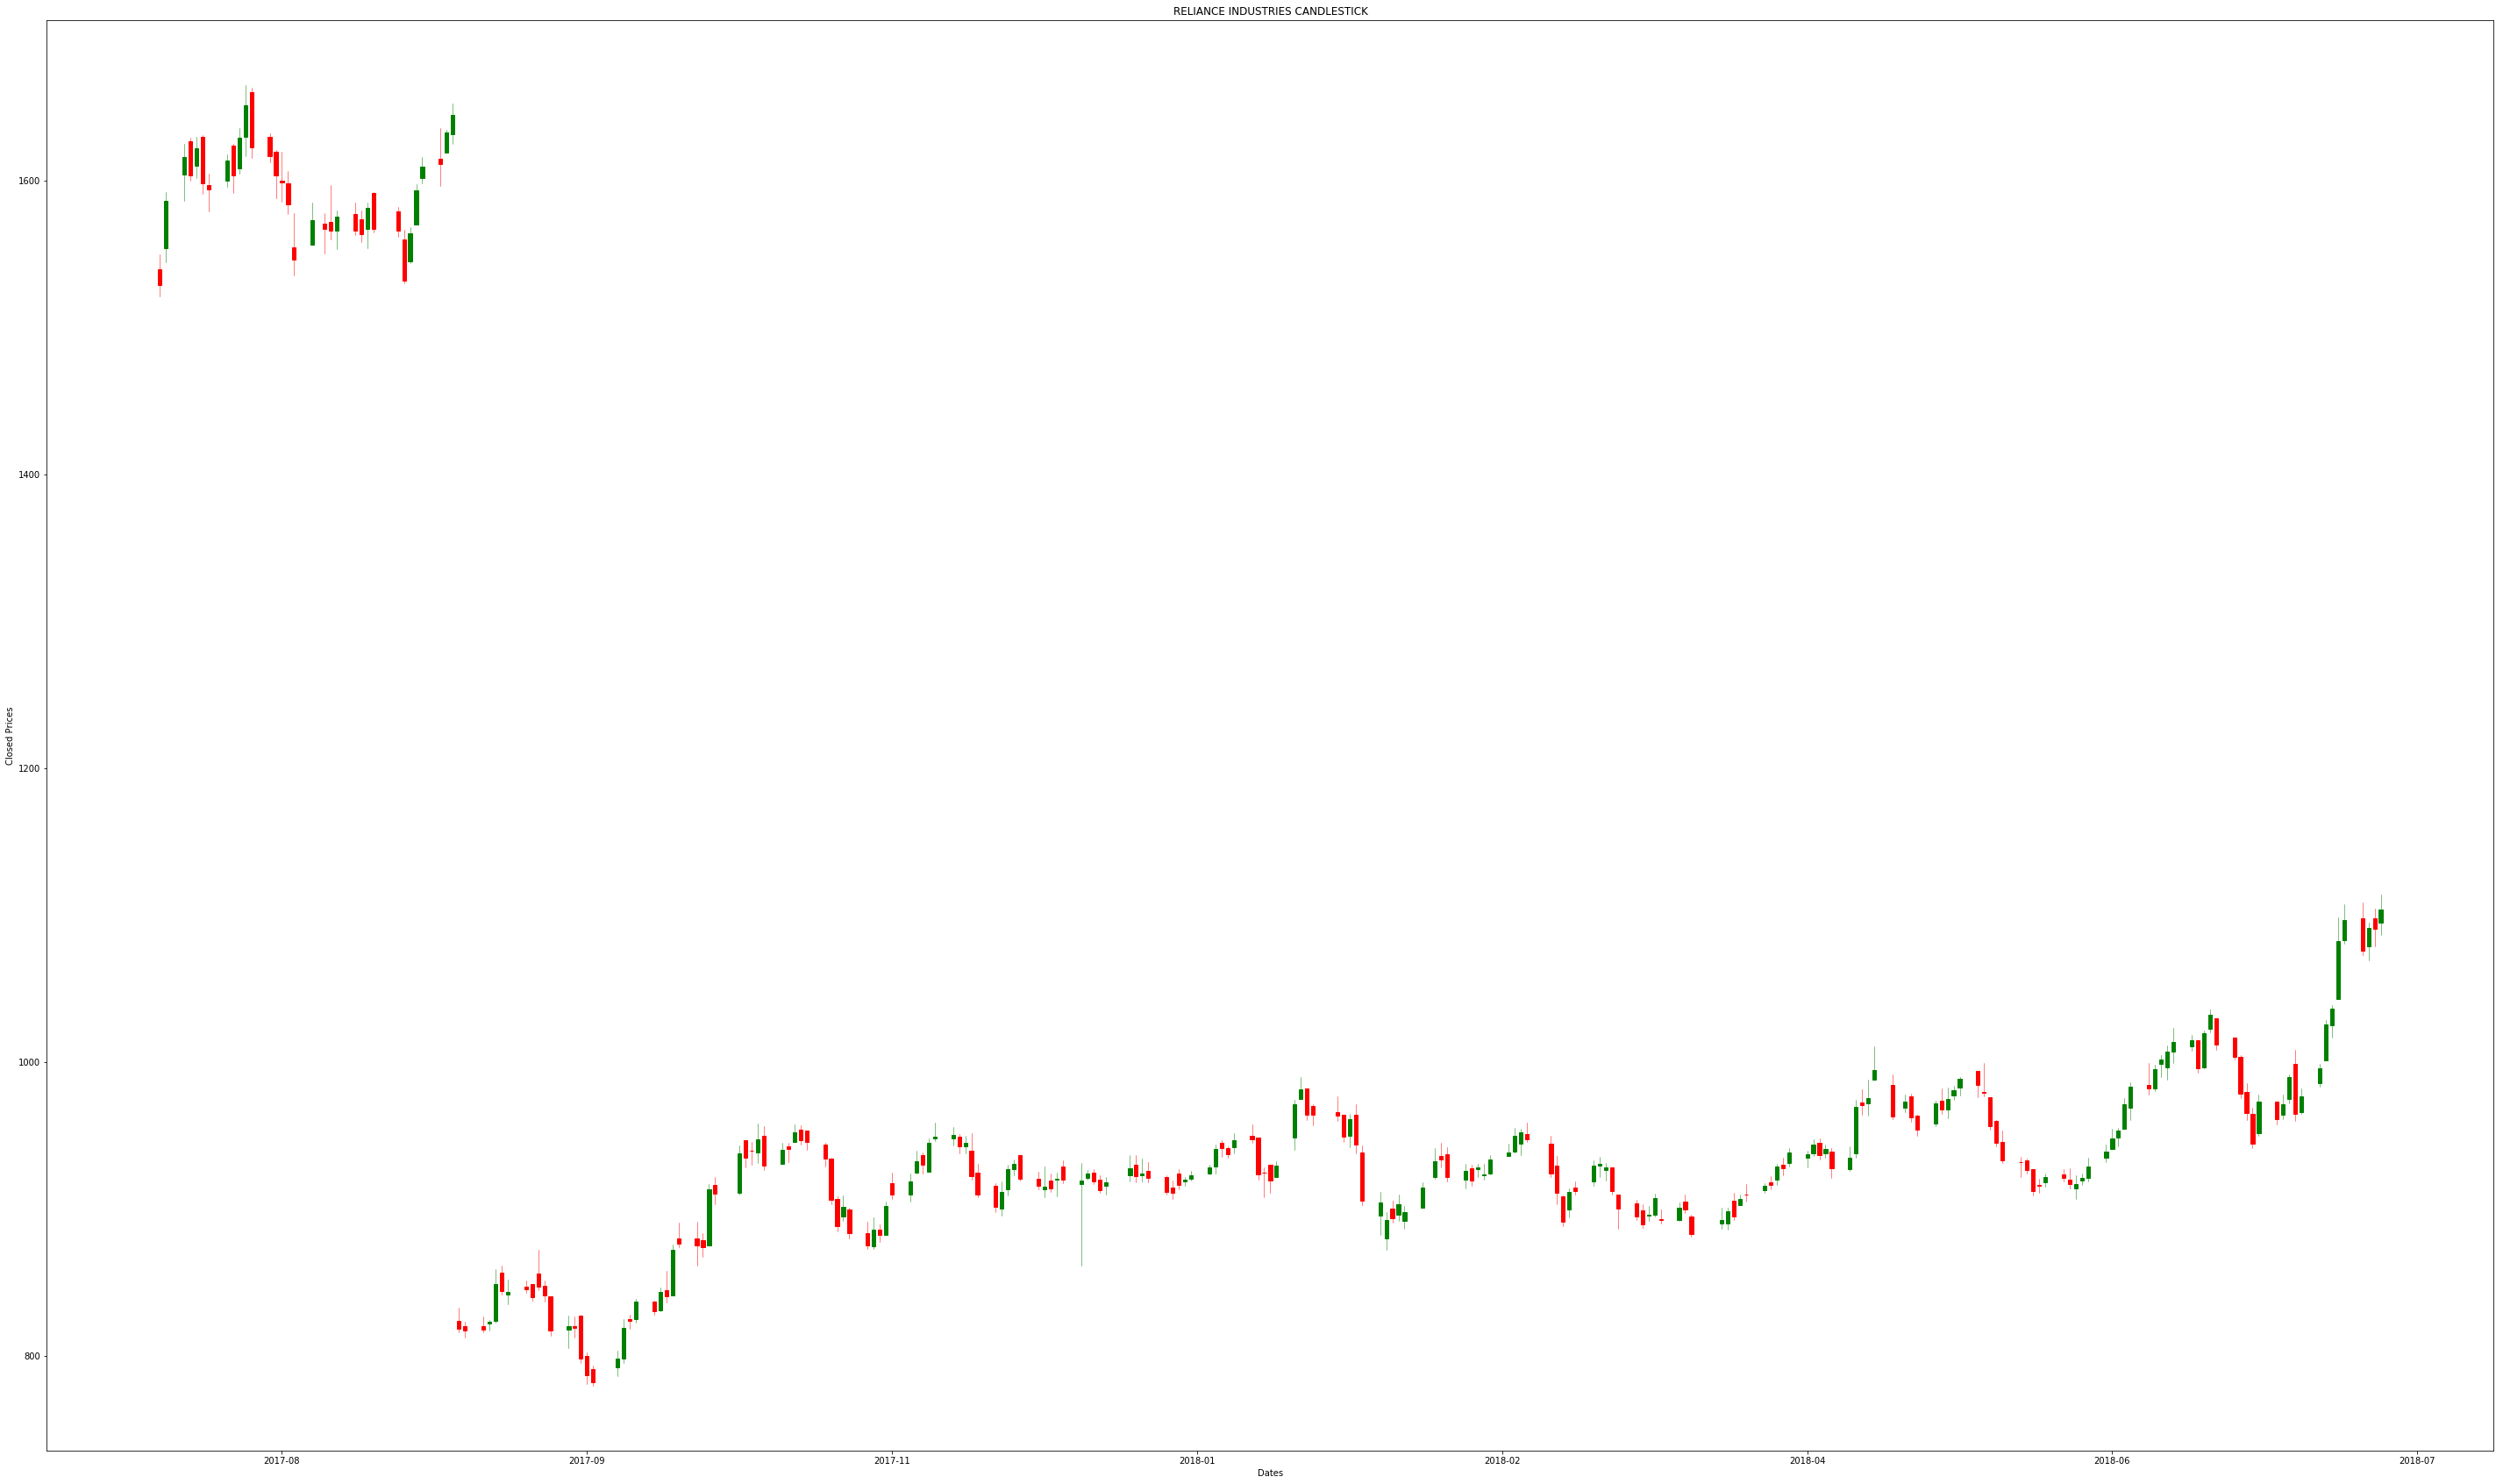

In [17]:
fig, ax = pt.subplots(figsize = (50,30))
# plot the candlesticks
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.set_xlabel('Dates')
ax.set_ylabel('Closed Prices')
ax.set_title('RELIANCE INDUSTRIES CANDLESTICK')
pt.savefig("RELIANCE INDUSTRIES CANDLESTICK")
pt.show()

In [18]:
# opens = REL_df.Open
# closes = REL_df.Close
# highs = REL_df.High
# lows = REL_df.Low
# fig, ax = pt.subplots(figsize=(20,6))

# candlestick2_ochl(ax, opens, closes, highs, lows, width=2, colorup=u'k', colordown=u'r', alpha=0.75)


# pt.show()

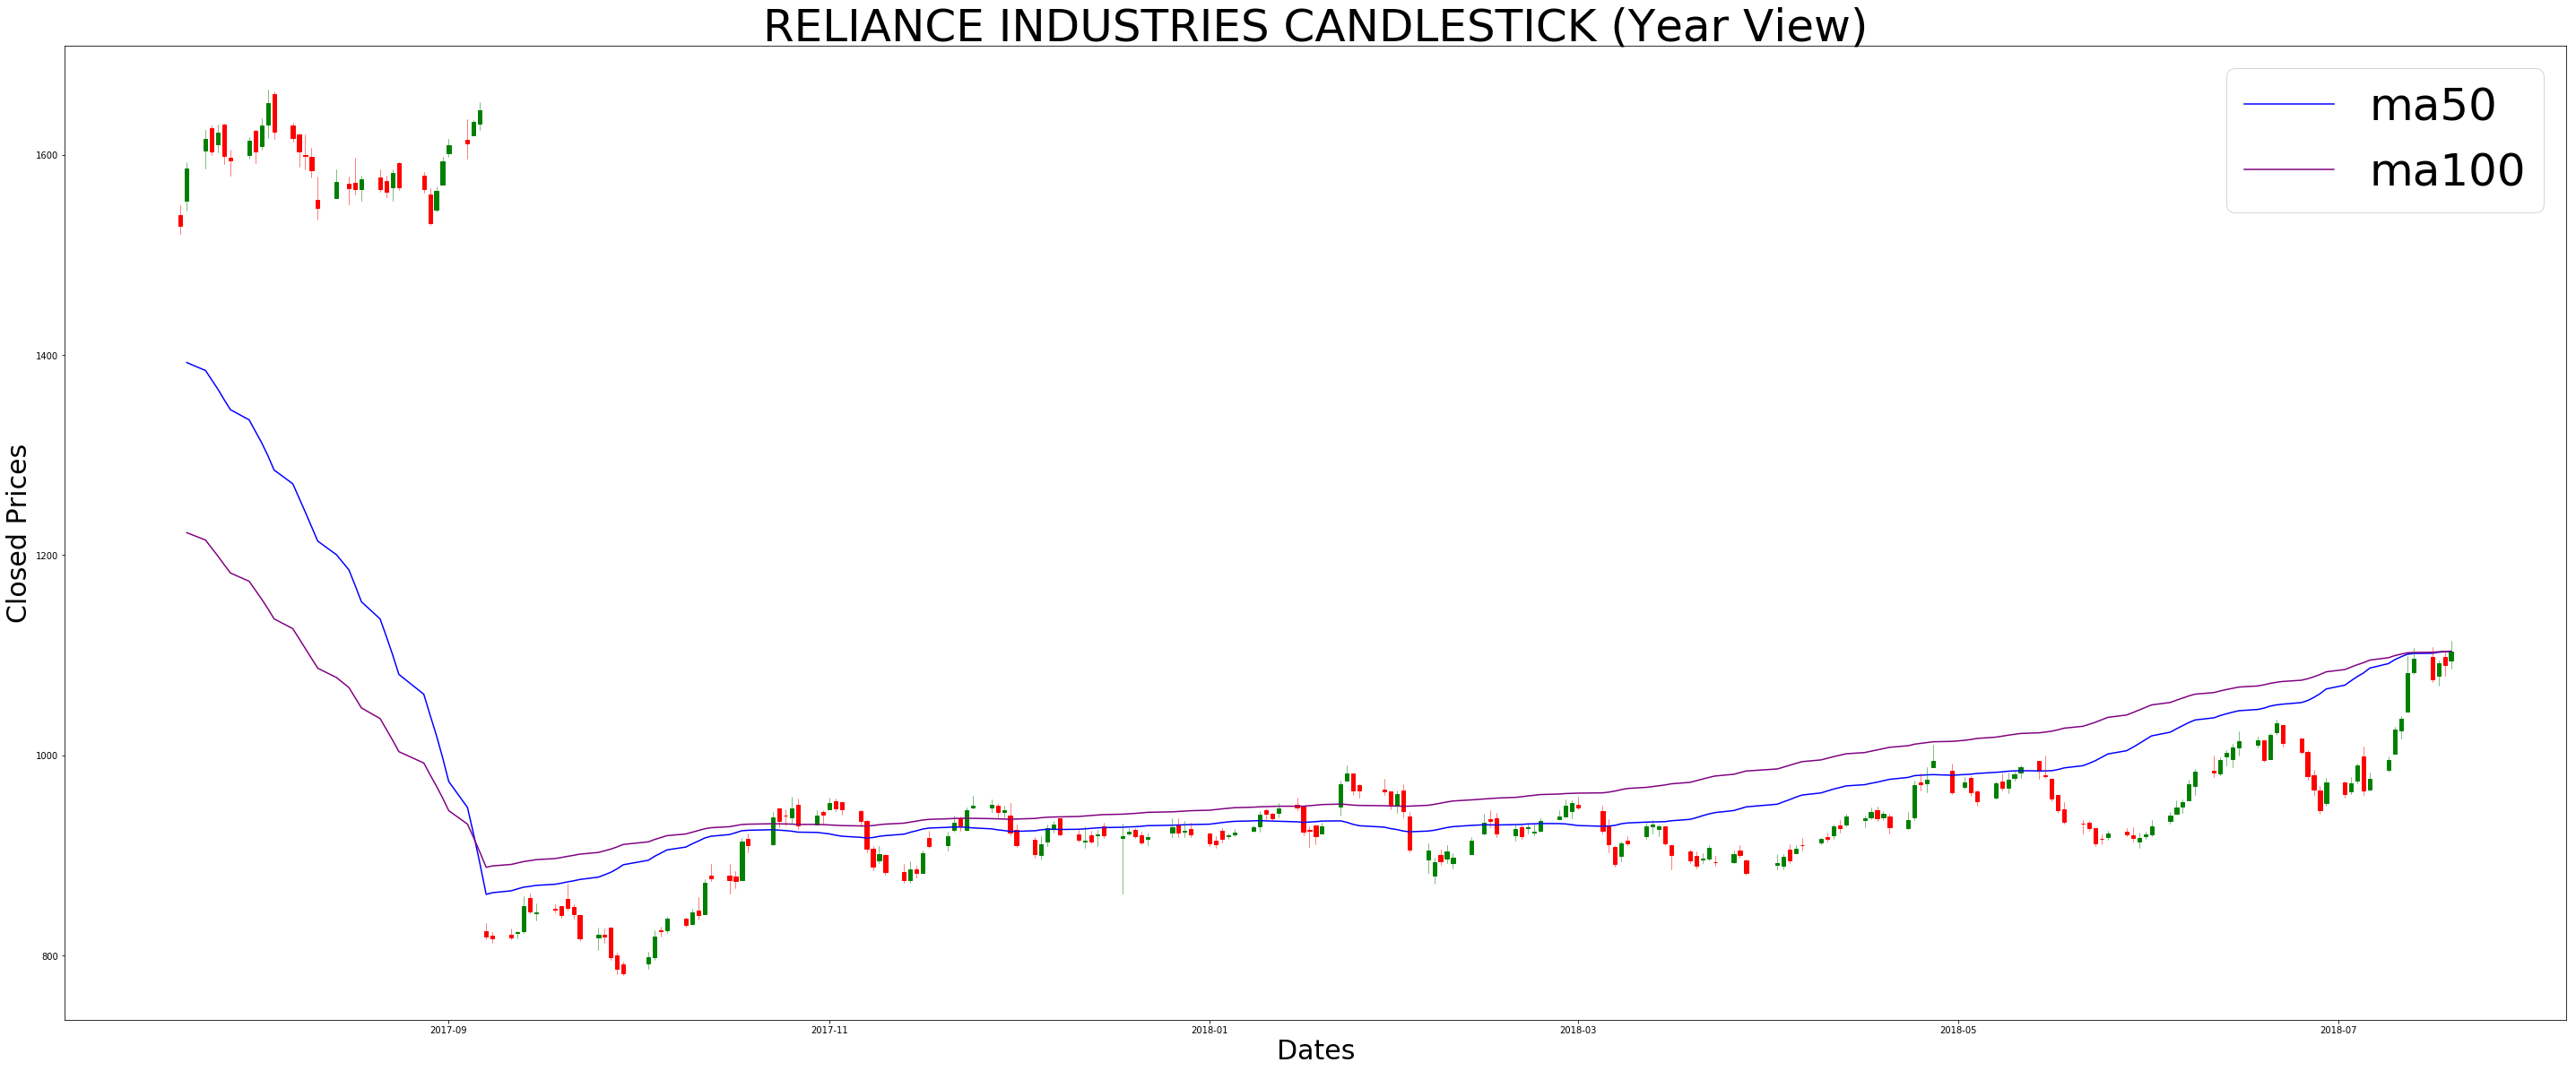

In [21]:
fig, ax = pt.subplots(figsize = (50,20))
REL_df['ema50'] = REL_df['Close'].ewm(span=50, adjust=False).mean()
REL_df['ema100'] = REL_df['Close'].ewm(span=100, adjust=False).mean()
REL_df = REL_df[REL_df.index > start]

# plot the moving average lines
ax.plot(REL_df.index, REL_df['ema50'], color = 'blue', label = 'ma50')
ax.plot(REL_df.index, REL_df['ema100'], color = 'purple', label = 'ma100')


# plot the candlesticks
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.set_xlabel('Dates',size=30)
ax.set_ylabel('Closed Prices', size=30)
ax.set_title('RELIANCE INDUSTRIES CANDLESTICK (Year View)', size=50)

# other parameters
ax.grid(False)
ax.legend()
pt.legend(prop={'size':50})
pt.show()